# Stroke Prediction


## Import the required Libraries


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the dataset

In [59]:
Strokedata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare stoke/strokedata.csv')

In [60]:
Strokedata = Strokedata.drop('id', axis=1)

let's see the first five rows of dataset


In [61]:
Strokedata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


let's see the bottom five rows of the data

In [62]:
Strokedata.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


 lets see size of the data

In [63]:
Strokedata.shape

### data Contain 5110 rows And 12 columns


(5110, 11)

Lets check the type of the feature

In [64]:
Strokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## EDA : Exploratory Data Analysis

In [65]:
Strokedata.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Some Analysis 
* bmi have some Missing values
* Pretty high Difference between #Mean of avg_glucose_level and 50% of avg_glucose_level

In [66]:
Strokedata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### EDA for Numerical data

In [67]:
numerical_data = Strokedata.select_dtypes("number")
numerical_data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [68]:
Strokedata['age']  = Strokedata['age'].astype(int)
Strokedata['age'].head()

0    67
1    61
2    80
3    49
4    79
Name: age, dtype: int64

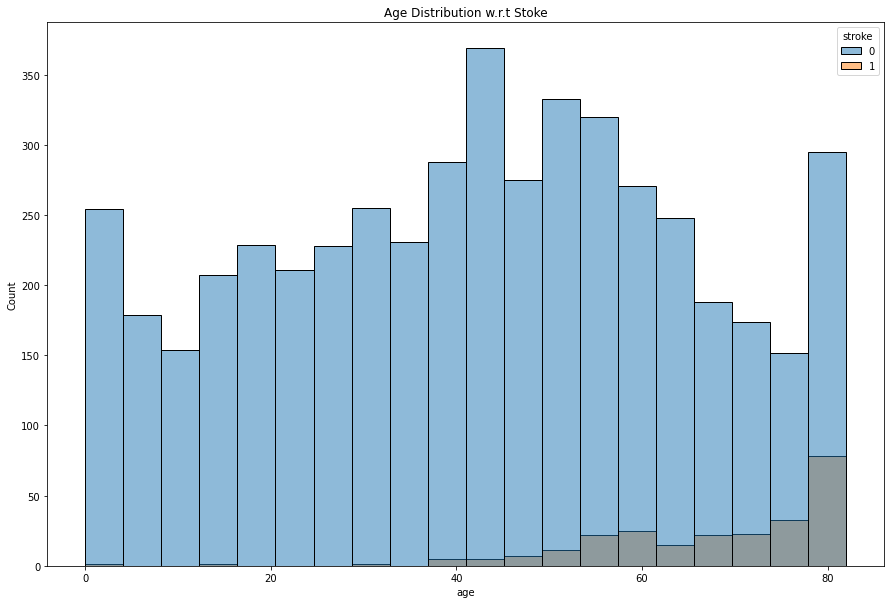

In [69]:
## Lets plot the Age and Stroke 
plt.figure(figsize=(15,10))
sns.histplot(x= 'age', hue='stroke',data =Strokedata)
plt.title("Age Distribution w.r.t Stoke")
plt.show()

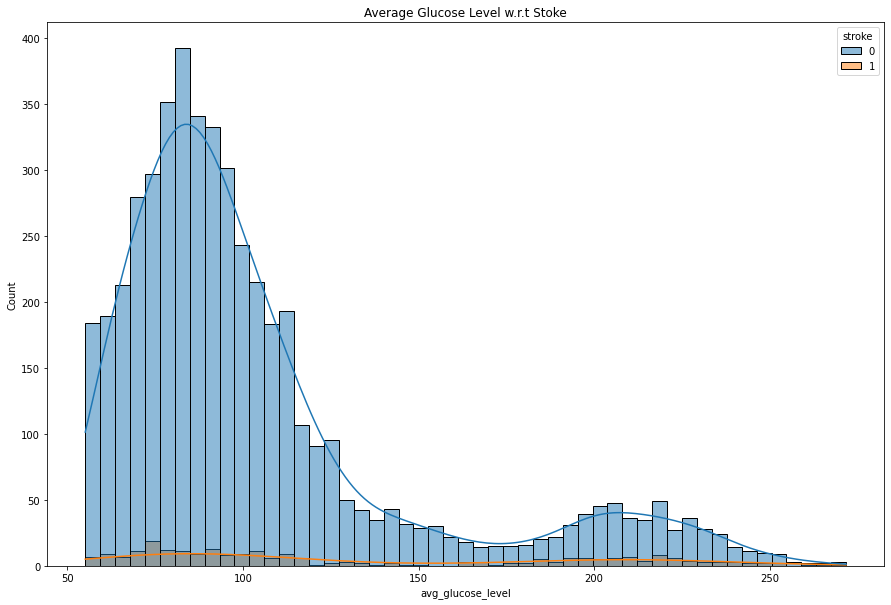

In [70]:
## Now plot the avg_glucose_level wrt Stroke
plt.figure(figsize=(15,10))
sns.histplot(hue='stroke' , x='avg_glucose_level',data =Strokedata,kde = True)
plt.title("Average Glucose Level w.r.t Stoke")
plt.show()

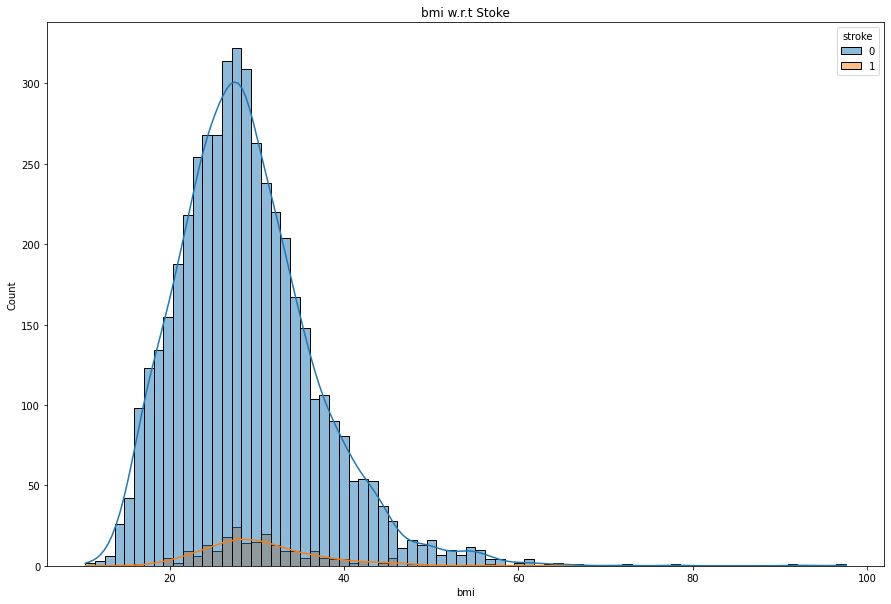

In [71]:
## for Bmi
plt.figure(figsize=(15,10))
sns.histplot(hue='stroke' , x='bmi',data =Strokedata,kde = True)
plt.title("bmi w.r.t Stoke")
plt.show()

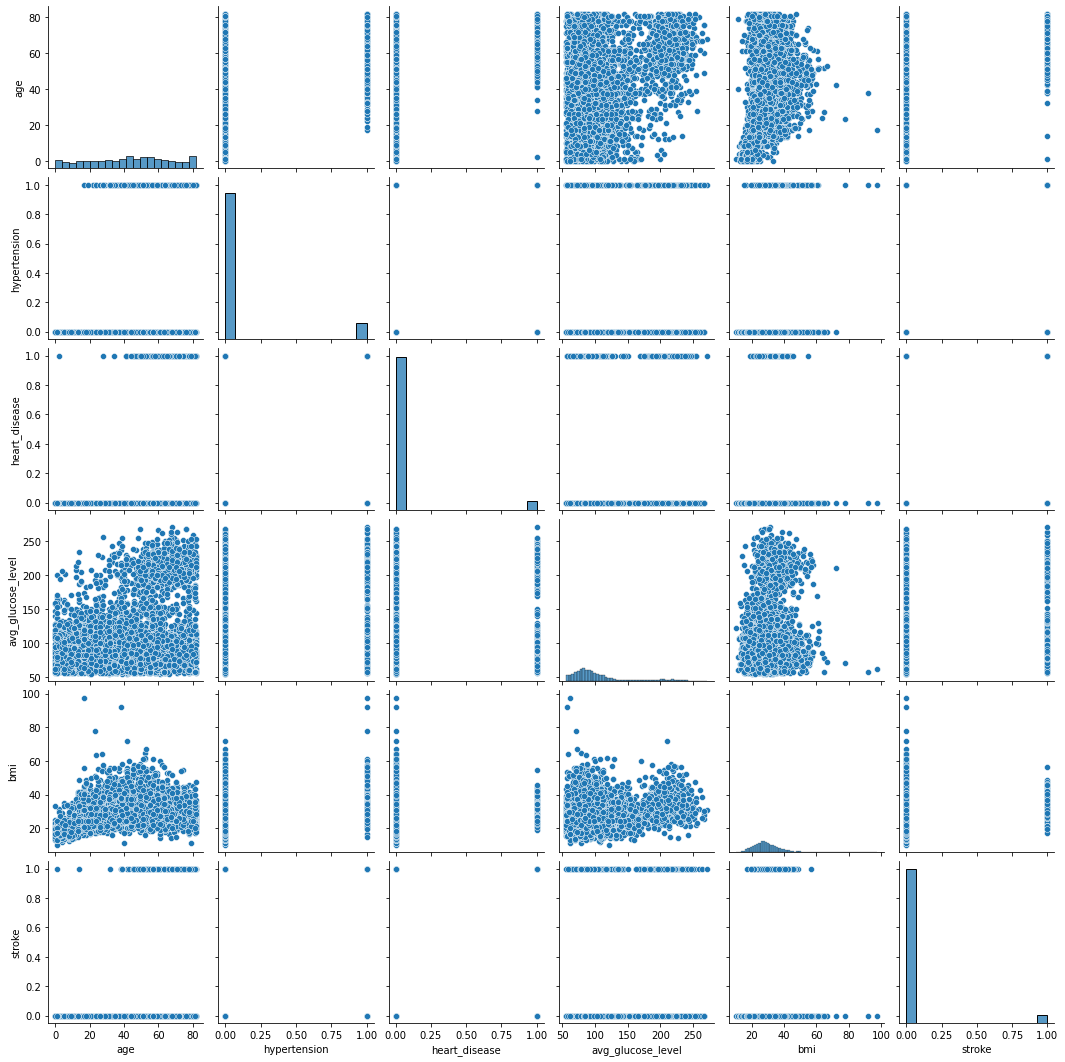

In [72]:
sns.pairplot(Strokedata)
plt.show()

### EDA for Categorical feature

In [74]:
categorical_data = Strokedata.select_dtypes(exclude = 'number')
categorical_data.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [77]:
 for feature  in categorical_data:
  print(Strokedata[feature].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


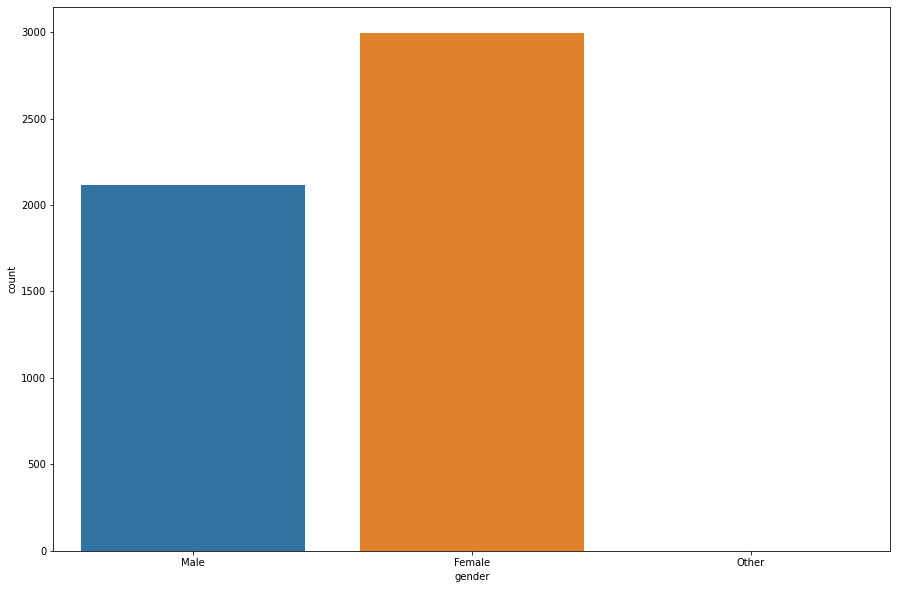

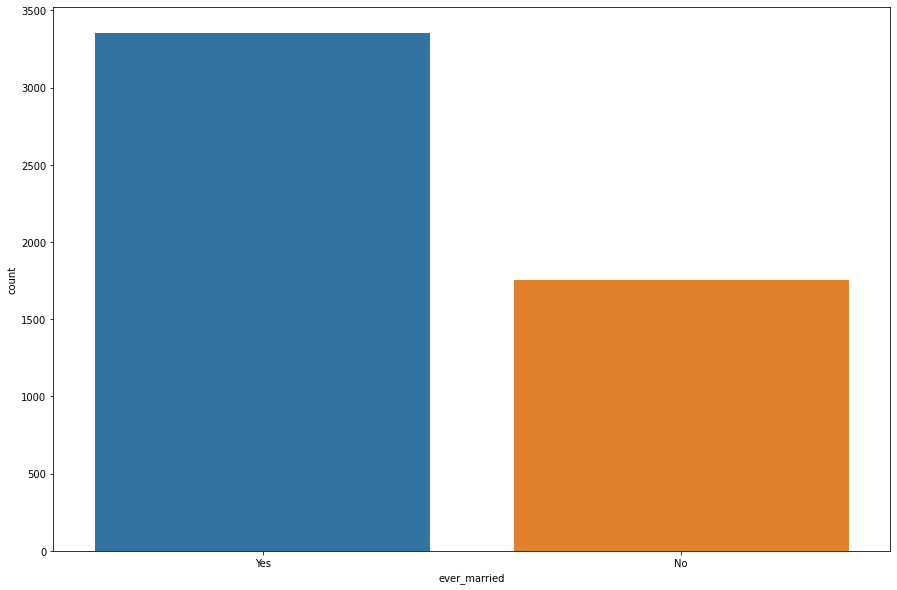

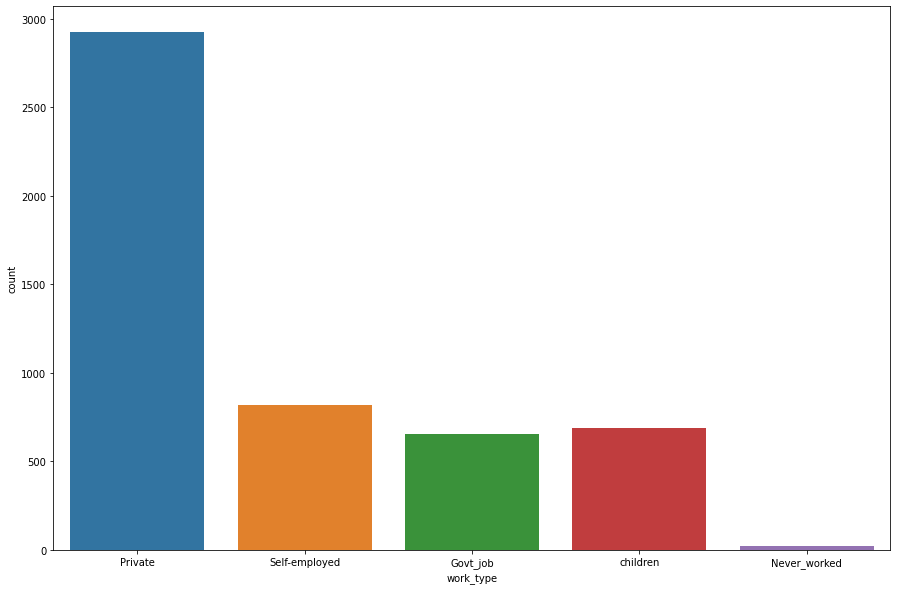

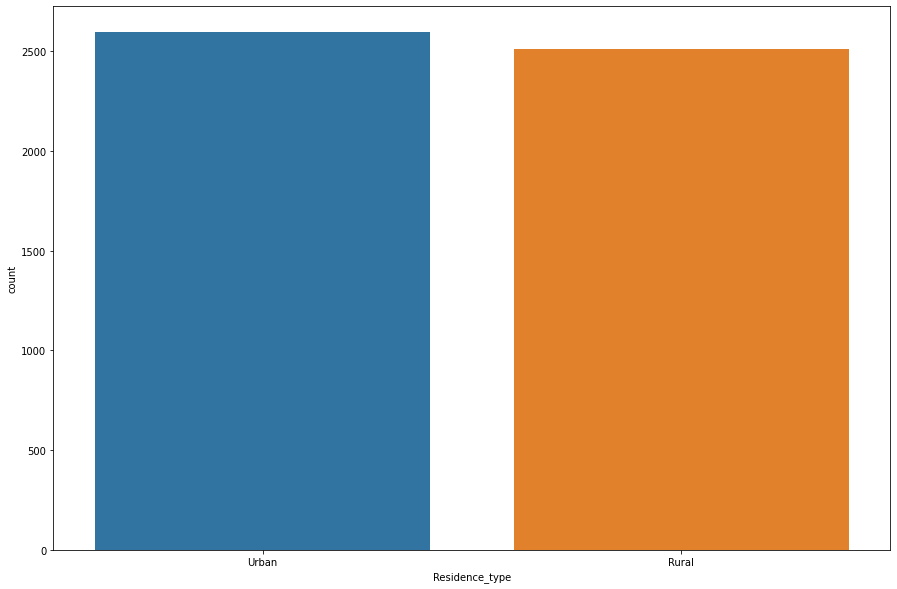

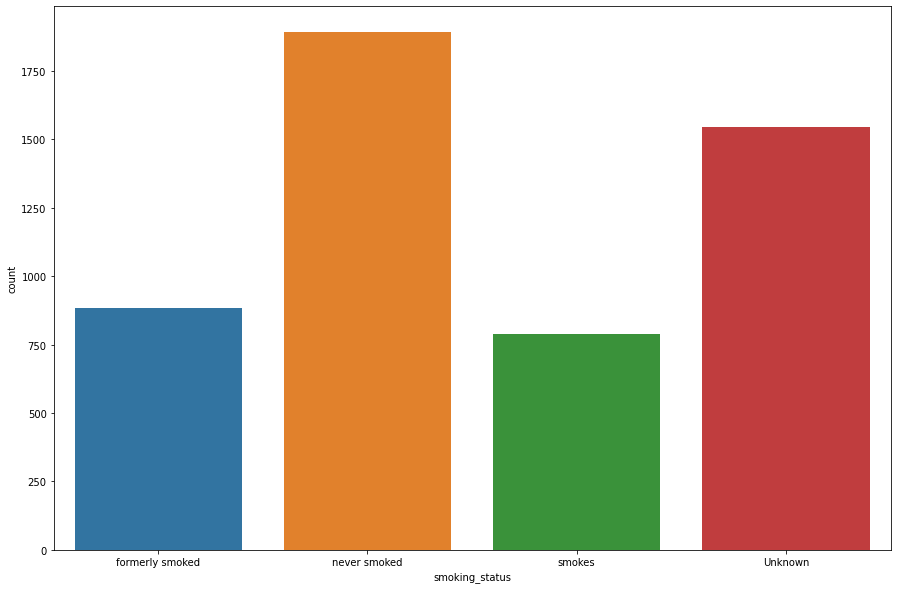

In [80]:
for feature in categorical_data:
  plt.figure(figsize = (15,10))
  sns.countplot(x = Strokedata[feature])
  plt.show()

## Feature Engineering

In [81]:
data = Strokedata.copy()

In [82]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [83]:
data['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [84]:
data.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [85]:
 # percentage of data missing
 data.isnull().mean().round(4) * 100

gender                0.00
age                   0.00
hypertension          0.00
heart_disease         0.00
ever_married          0.00
work_type             0.00
Residence_type        0.00
avg_glucose_level     0.00
bmi                   3.93
smoking_status       30.22
stroke                0.00
dtype: float64

In [86]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data['smoking_status'].fillna(data['smoking_status'].mode()[0], inplace = True)

In [87]:
 data.isnull().mean().round(4) * 100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

After filling the missing Values Countplot

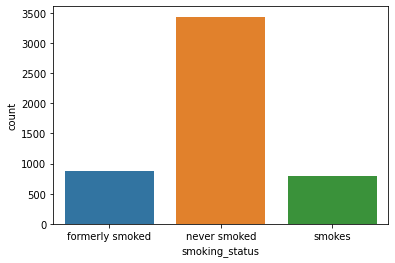

In [89]:
sns.countplot(x = data['smoking_status'])

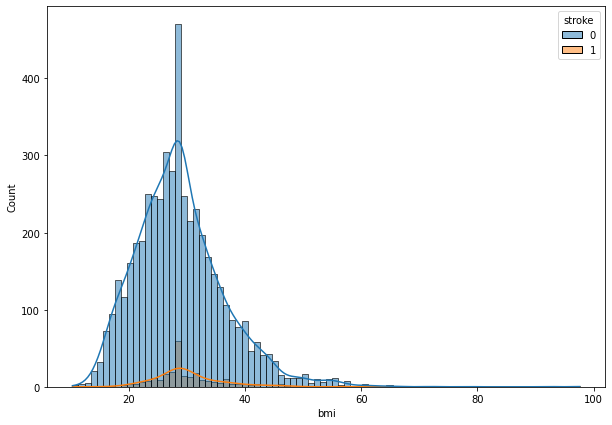

In [94]:
plt.figure(figsize=(10,7))
sns.histplot(x ='bmi',hue = 'stroke',data = data,kde =True)
plt.show()

In [96]:
from sklearn.preprocessing import LabelEncoder


In [97]:
le  = LabelEncoder()
en_data = data.apply(le.fit_transform)


In [98]:
en_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,3850,240,0,1
1,0,61,0,0,1,3,0,3588,162,1,1
2,1,80,0,1,1,2,0,2483,199,1,1
3,0,49,0,0,1,2,1,3385,218,2,1
4,0,79,1,0,1,3,0,3394,113,1,1


## Feature Selection

In [99]:
y = en_data['stroke']
X = en_data.drop('stroke',axis =1)

### train test Split

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

## Feature Scaling

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training Model using RandomForestClassifer

In [110]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100,random_state=0)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The Training Score of RandomForestClassifier is: {:.3f}%".format(model_rf.score(X_train, y_train)*100))
print("\n**********************************************************************\n")
print("The Confusion Matrix for RandomForestClassifier is: \n{}\n".format(confusion_matrix(y_test, y_pred)))
print("\n**********************************************************************\n")
print("The Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
print("\n**********************************************************************\n") 
print("The Accuracy Score of RandomForestClassifier is: {:.3f}%".format(accuracy_score(y_test, y_pred)*100))

The Training Score of RandomForestClassifier is: 99.971%

**********************************************************************

The Confusion Matrix for RandomForestClassifier is: 
[[1602    3]
 [  82    0]]


**********************************************************************

The Classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1605
           1       0.00      0.00      0.00        82

    accuracy                           0.95      1687
   macro avg       0.48      0.50      0.49      1687
weighted avg       0.91      0.95      0.93      1687



**********************************************************************

The Accuracy Score of RandomForestClassifier is: 94.961%
